In [1]:
#########
# BASIC #
#########
import os
import sys
import platform
import warnings
from datetime import datetime
from collections import Counter
import calendar
from tqdm.notebook import tqdm_notebook

#############
# LOAD DATA #
#############
import numpy as np
import pandas as pd

#############################
# EXPLORATORY DATA ANALYSIS #
#############################
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

######################
# DATA PREPROCESSING #
######################
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
## NATURAL LANGUAGE PROCESSING 
from konlpy.tag import Komoran
from gensim.models import Word2Vec

#######################
# FEATURE ENGINEERING #
#######################
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#####################
# FEATURE SELECTION #
#####################


############
# MODELING #
############
## MACHINE LEARNING
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

## DEEP LEARNING
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import joblib
import pickle

###########
# TESTING #
###########
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:.4f}'.format
# plt.style.use('ggplot')
if platform.platform().split('-')[0] == 'Windows':
    mpl.rcParams['font.family'] = 'Malgun Gothic' # Windows에서는 한글이 나오게 하기 위해서
else: # macOS라고 가정
    mpl.rcParams['font.family'] = 'AppleGothic' # mac에서는 한글이 나오게 하기 위해서

mpl.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
device = 'cuda'  if torch.cuda.is_available() else 'cpu'
if torch.cuda.is_available():
    print(f'현재 CUDA를 사용할 수 있습니다. 사용하고 있는 장치는 {device} 입니다.')
else:
    print(f'현재 CUDA를 사용할 수 없습니다. 사용하고 있는 장치는 {device} 입니다. CPU로 학습시 오래 걸릴 수 있습니다.')

현재 CUDA를 사용할 수 있습니다. 사용하고 있는 장치는 cuda 입니다.


In [3]:
RANDOM_STATE = 42
TEST_SIZE = 0.2
learning_rate = 1e-4

In [4]:
data = dict()
data['train'] = pd.read_excel(r'../../data/01_제공데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_2019년 실적데이터_v1_200818.xlsx',
                       header=1,
                       names=['방송일시', '노출(분)', '마더코드', '상품코드',
                              '상품명', '상품군', '판매단가', '취급액'],
                       thousands=',',
                       )
data['train'].index = pd.to_datetime(data['train']['방송일시'])
data['train'] = data['train'].drop('방송일시',axis=1)
data['train'] = data['train']['2019']
data['train']

,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
방송일시,,,,,,,
2019-01-01 06:00:00,20.0000,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0000
2019-01-01 06:00:00,nan,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0000
2019-01-01 06:20:00,20.0000,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0000
2019-01-01 06:20:00,nan,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0000
2019-01-01 06:40:00,20.0000,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0000
...,...,...,...,...,...,...,...
2019-12-31 23:20:00,nan,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000.0000
2019-12-31 23:40:00,20.0000,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000.0000
2019-12-31 23:40:00,nan,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000.0000


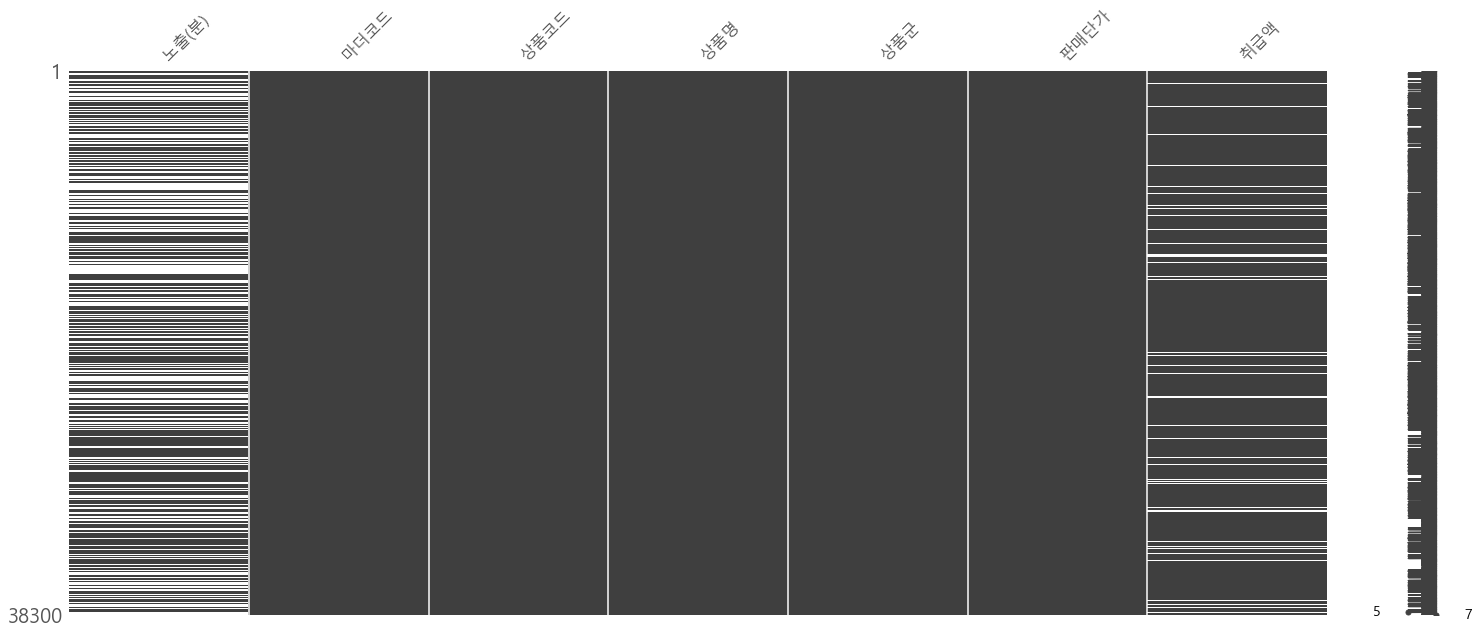

In [5]:
msno.matrix(data['train'])
plt.show()

In [19]:
data['train'][data['train'].취급액.isna()]

,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
방송일시,,,,,,,
2019-01-02 22:00:00,nan,100148,200432,무이자 LG 울트라HD TV 55UK6800HNC,가전,1440000,nan
2019-01-02 22:00:00,nan,100148,200518,일시불 LG 울트라HD TV 70UK7400KNA,가전,2700000,nan
2019-01-02 22:00:00,nan,100148,200451,무이자 LG 울트라HD TV 70UK7400KNA,가전,2990000,nan
2019-01-02 22:20:00,nan,100148,200518,일시불 LG 울트라HD TV 70UK7400KNA,가전,2700000,nan
2019-01-02 22:20:00,nan,100148,200451,무이자 LG 울트라HD TV 70UK7400KNA,가전,2990000,nan
...,...,...,...,...,...,...,...
2019-12-30 18:20:00,60.0000,100072,200194,"삼성화재 천만안심 건강보험(암보험, 1907)",무형,0,nan
2019-12-31 13:20:00,60.0000,100072,200194,"삼성화재 천만안심 건강보험(암보험, 1907)",무형,0,nan
2019-12-31 22:20:00,20.0000,100543,201624,넥센타이어 렌탈서비스,무형,0,nan


In [16]:
data['train'][(data['train'].취급액.isna()) & (data['train'].상품군=='무형')]

,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
방송일시,,,,,,,
2019-01-25 19:00:00,60.0000,100507,201567,TCOM_처브치아보험,무형,0,nan
2019-01-31 18:00:00,60.0000,100507,201567,TCOM_처브치아보험,무형,0,nan
2019-02-05 18:00:00,60.0000,100507,201567,TCOM_처브치아보험,무형,0,nan
2019-03-09 00:00:00,20.0000,100324,201095,온라인투어 동남아 나트랑/빈펄랜드 (190309),무형,0,nan
2019-03-09 00:20:00,20.0000,100324,201095,온라인투어 동남아 나트랑/빈펄랜드 (190309),무형,0,nan
...,...,...,...,...,...,...,...
2019-12-30 18:20:00,60.0000,100072,200194,"삼성화재 천만안심 건강보험(암보험, 1907)",무형,0,nan
2019-12-31 13:20:00,60.0000,100072,200194,"삼성화재 천만안심 건강보험(암보험, 1907)",무형,0,nan
2019-12-31 22:20:00,20.0000,100543,201624,넥센타이어 렌탈서비스,무형,0,nan


In [20]:
data['train'].dropna(axis=0, subset=['취급액']).fillna(method='ffill')

,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
방송일시,,,,,,,
2019-01-01 06:00:00,20.0000,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0000
2019-01-01 06:00:00,20.0000,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0000
2019-01-01 06:20:00,20.0000,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0000
2019-01-01 06:20:00,20.0000,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0000
2019-01-01 06:40:00,20.0000,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0000
...,...,...,...,...,...,...,...
2019-12-31 23:20:00,20.0000,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000.0000
2019-12-31 23:40:00,20.0000,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000.0000
2019-12-31 23:40:00,20.0000,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000.0000


In [5]:
data['train']['연'] = data['train'].index.map(lambda x: x.year)
data['train']['월'] = data['train'].index.map(lambda x: x.month)
data['train']['주'] = data['train'].index.map(lambda x: x.week)
data['train']['일'] = data['train'].index.map(lambda x: x.day)
data['train']['시'] = data['train'].index.map(lambda x: x.hour)
data['train']['분'] = data['train'].index.map(lambda x: x.minute)
data['train']['요일'] = data['train'].index.map(lambda x: calendar.day_abbr[x.weekday()])

In [6]:
def re_sub(series: pd.Series) -> pd.Series:
    series = series.str.replace(pat=r'[ㄱ-ㅎ]', repl=r'', regex=True)  # ㅋ 제거용
    series = series.str.replace(pat=r'[^\w\s]', repl=r'', regex=True)  # 특수문자 제거
    series = series.str.replace(pat=r'[ ]{2,}', repl=r' ', regex=True)  # 공백 제거
    series = series.str.replace(pat=r'[\u3000]+', repl=r'', regex=True)  # u3000 제거
    return series

In [7]:
train = data['train'][['상품명', '상품군']].copy()
train.상품명 = re_sub(train.상품명)

In [8]:
prod_names = (train[train.상품군 != '무형'].상품명 + ' ' + train[train.상품군 != '무형'].상품군).values # len(prod_names) > 1692 (무형 빼고)

In [9]:
komoran = Komoran(userdic='../../data/04_추가데이터/user_dict_0913.txt')
print(komoran.pos("KOMORAN은 한국어 형태소 분석기입니다."))

[('KOMORAN', 'SL'), ('은', 'JX'), ('한국어', 'NNP'), ('형태소', 'NNP'), ('분석기', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EF'), ('.', 'SF')]


In [10]:
naive_tokens = list(map(komoran.pos, prod_names))

In [11]:
def morph_filter(lst):
    return list(map(lambda x: x[0], filter(lambda x: (x[1] in usable_morphs), lst)))

usable_morphs = ['NNG', 'NNP', 'NP', 'NR'] #+ ['SL', 'SN']
naive_tokens = list(map(morph_filter, naive_tokens))

In [12]:
exclude_words = ['종', '인용']
def exclude(lst):
    return list(filter(lambda x: x not in exclude_words, lst))
processed_tokens = list(map(exclude, naive_tokens))

## To a single string to find all the duplicates

In [44]:
to_string = list(map(lambda x: ' '.join(x[:-1]), processed_tokens))

In [45]:
train = data['train'][data['train'].상품군 != '무형']

In [47]:
data['train'].shape

(38300, 14)

In [48]:
train['unique_name'] = to_string

## Do groupby - no need...

In [50]:
grouppp = train[['취급액', '판매단가', '상품군', 'unique_name', '요일']].groupby(['상품군', 'unique_name', '요일']).agg(['mean', 'std'])

In [51]:
grouppp

취급액                     판매단가  \
                                          mean          std        mean   
상품군 unique_name              요일                                           
가구  뉴 벨라홈 리클라이닝 소파           Fri 15870333.3333 5812839.0080  89000.0000   
                             Sat 14083000.0000 7339189.2604  89000.0000   
    레스토닉 블루투스 LED 서랍 침대 슈퍼싱글 Thu 10080666.6667 9273819.7812 649000.0000   
                             Tue  8291200.0000 6207840.4216 619000.0000   
                             Wed 30136000.0000          nan 649000.0000   
...                                        ...          ...         ...   
침구  효재 화원 자수 광목워싱 침구 세트 슈퍼싱글 Wed  3084333.3333 1614733.8274 139000.0000   
    효재 화원 자수 광목워싱 침구 세트 퀸    Tue  4987333.3333 3720246.4076 129000.0000   
                             Wed  4885000.0000 4423994.4620 159000.0000   
    효재 화원 자수 광목워싱 침구 세트 킹    Tue 13990666.6667 6006799.6748 149000.0000   
                             Wed  8183000.0000 5032094.4943 179000.0000   

                                             
                                        std  
상품군 unique_name              요일              
가구  뉴 벨라홈 리클라이닝 소파           Fri     0.0000  
                             Sat     0.0000  
    레스토닉 블루투스 LED 서랍 침대 슈퍼싱글 Thu     0.0000  
                             Tue 27386.1279  
                             Wed        nan  
...                                     ...  
침구  효재 화원 자수 광목워싱 침구 세트 슈퍼싱글 Wed     0.0000  
    효재 화원 자수 광목워싱 침구 세트 퀸    Tue     0.0000  
                             Wed     0.0000  
    효재 화원 자수 광목워싱 침구 세트 킹    Tue     0.0000  
                             Wed     0.0000  

[4960 rows x 4 columns]

## Plot Groupby

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
cat = '의류'

<Figure size 1440x2880 with 0 Axes>

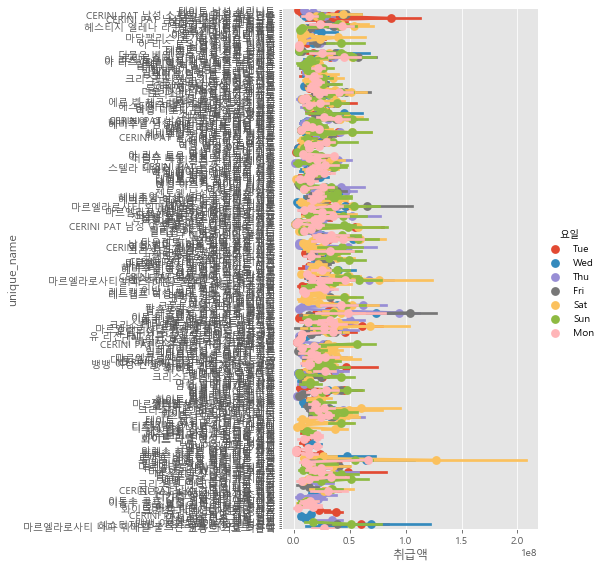

In [55]:
plt.figure(figsize=(20, 40))
sns.factorplot(data=train[train.상품군==cat],
              x='취급액', y='unique_name', size=8, legend_out=True,
              hue='요일')